In [3]:
import pandas as pd
pancan_data_source = "AE_Early_Meth_GE_Pancan.csv"
pancan_data = pd.read_csv(pancan_data_source,index_col=0)

In [19]:
new_indices = []
for index in pancan_data.index:
    newindex = "-".join(index.split("-")[:-1])
    new_indices.append(newindex)
pancan_data.index = new_indices
pancan_data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_6,feature_7,feature_8,feature_10,feature_11,...,feature_89,feature_90,feature_91,feature_92,feature_93,feature_95,feature_96,feature_97,feature_98,feature_99
TCGA-05-4384,17.831331,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,13.142127,1.278663,...,0.0,7.390986,0.0,0.0,0.0,0.0,0.000000,0.000000,3.824075,7.107817
TCGA-05-4390,22.142433,0.0,0.0,0.0,2.878235,0.0,0.325526,0.0,9.344397,0.000000,...,0.0,4.266699,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,7.453605
TCGA-05-4396,39.490234,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,25.703640,1.700601,...,0.0,5.136548,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,10.962602
TCGA-05-4405,19.198880,0.0,0.0,0.0,0.024567,0.0,0.000000,0.0,4.935136,0.000000,...,0.0,5.200054,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
TCGA-05-4410,18.190372,0.0,0.0,0.0,0.000000,0.0,6.775871,0.0,4.238550,0.000000,...,0.0,5.066419,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.842899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-ZS-A9CG,0.000000,0.0,0.0,0.0,0.000000,0.0,0.298041,0.0,11.745266,0.000000,...,0.0,4.083134,0.0,0.0,0.0,0.0,12.466956,3.307170,0.000000,7.274729
TCGA-ZT-A8OM,0.000000,0.0,0.0,0.0,6.532669,0.0,0.000000,0.0,6.218047,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,19.377306,0.000000,0.000000
TCGA-ZU-A8S4,9.883488,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,18.581404,0.000000,...,0.0,22.084250,0.0,0.0,0.0,0.0,0.000000,6.880846,0.000000,0.000000
TCGA-ZU-A8S4,2.393877,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,12.087870,2.420494,...,0.0,5.535060,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,12.881165


In [12]:
survival_data = pd.read_csv("TCGA-CDR-SurvivalData.csv",index_col=0)
lung_types = ["LUAD","LUSC"]
survival_data = survival_data.loc[survival_data['type'].isin(lung_types)] #Subsetting rows in pandas

In [21]:
lung_cancer_patients = survival_data['bcr_patient_barcode'].tolist()

In [24]:
lungcan_ae = pancan_data.loc[pancan_data.index.isin(lung_cancer_patients)] 

In [31]:
#Scaling these features to 0,1 range for applying tsne
from sklearn.preprocessing import MinMaxScaler
feature_list = lungcan_ae.columns.tolist()
scaler = MinMaxScaler(feature_range=(0,1))
lungcan_ae[feature_list] = scaler.fit_transform(lungcan_ae[feature_list])

C:\Users\ssrikrishnan6\AppData\Local\Temp\ipykernel_9268\1020178856.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lungcan_ae[feature_list] = scaler.fit_transform(lungcan_ae[feature_list])


In [32]:
lungcan_ae

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_6,feature_7,feature_8,feature_10,feature_11,...,feature_89,feature_90,feature_91,feature_92,feature_93,feature_95,feature_96,feature_97,feature_98,feature_99
TCGA-05-4384,0.424102,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.351233,0.063836,...,0.0,0.115183,0.0,0.0,0.0,0.0,0.0,0.000000,0.097843,0.202079
TCGA-05-4390,0.526638,0.0,0.0,0.000000,0.116445,0.0,0.015324,0.0,0.249736,0.000000,...,0.0,0.066493,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.211910
TCGA-05-4396,0.939240,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.686949,0.084901,...,0.0,0.080049,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.311673
TCGA-05-4405,0.456628,0.0,0.0,0.000000,0.000994,0.0,0.000000,0.0,0.131895,0.000000,...,0.0,0.081039,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
TCGA-05-4410,0.432642,0.0,0.0,0.000000,0.000000,0.0,0.318970,0.0,0.113278,0.000000,...,0.0,0.078956,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.023964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-O2-A52V,0.202103,0.0,0.0,0.000000,0.202287,0.0,0.056243,0.0,0.000000,0.000000,...,0.0,0.041320,0.0,0.0,0.0,0.0,0.0,0.004804,0.000000,0.027858
TCGA-O2-A52W,0.292179,0.0,0.0,0.135515,0.135336,0.0,0.207974,0.0,0.000000,0.057951,...,0.0,0.070406,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.220352
TCGA-O2-A5IB,0.501819,0.0,0.0,0.798148,0.071830,0.0,0.332566,0.0,0.000000,0.000000,...,0.0,0.129829,0.0,0.0,0.0,0.0,0.0,0.472033,0.082820,0.000000
TCGA-S2-AA1A,0.226423,0.0,0.0,0.000000,0.000000,0.0,0.095093,0.0,0.217397,0.000000,...,0.0,0.045023,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.049927


## K-Means Clustering


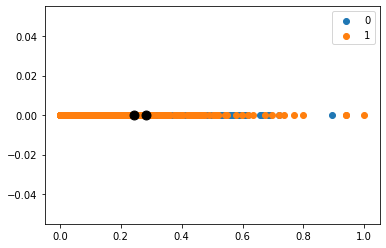

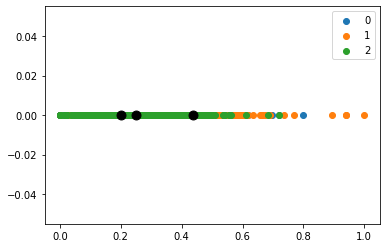

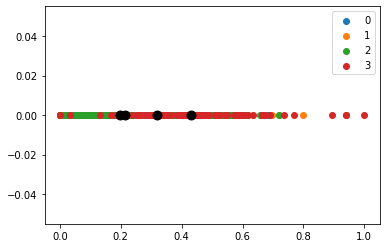

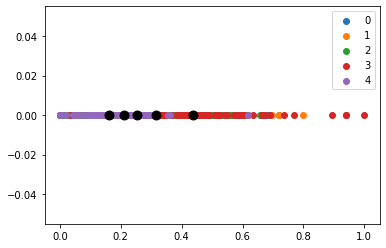

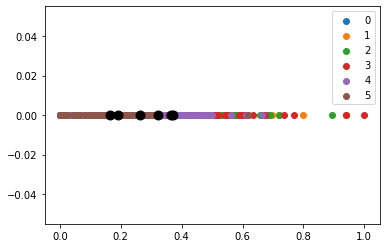

In [38]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

inertias = []
sil = []
ch_score = []

cluster_map = pd.DataFrame()
cluster_map.index = lungcan_ae.index

def kmeans(total_clusters,df):
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=total_clusters, random_state=77)
    
    #Predict the labels of clusters
    label = model.fit_predict(df)
    
    #Getting the Centroids
    centroids = model.cluster_centers_
    
    #Getting unique labels
    u_labels = np.unique(label)

    for i in u_labels:
        plt.scatter(df.iloc[label == i , 0] , df.iloc[label == i , 1] , label = i) #s=50, cmap='viridis'
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k') #s=200, alpha=0.5)
    plt.legend()
    plt.show()
    
    if (total_clusters>=2): #Min 2 clusters needed for this metric
        #Calcualting CH Score for evaluating better Cluster
        ch_score.append(metrics.calinski_harabasz_score(df, label))
        
        #Calculating Silhouetter Score
        sil.append(silhouette_score(df, model.labels_, metric = 'euclidean'))
    
    #Calculating Elbow Point - Append the inertia to the list of inertias - t
    inertias.append(model.inertia_)
    
    #Adding the cluster number (aka label) of each index, for total_clusters, to the cluster_map dataframe
    if (total_clusters>=2) and (total_clusters<=5):
        selected_variable = '{}_cluster_number'.format(str(total_clusters))
        cluster_map[selected_variable] = model.labels_
        
kmin = 2 
kmax = 7
for k in range(kmin, kmax):
    kmeans(k,lungcan_ae)

In [39]:
cluster_map

,2_cluster_number,3_cluster_number,4_cluster_number,5_cluster_number
TCGA-05-4384,0,2,2,2
TCGA-05-4390,0,1,3,3
TCGA-05-4396,1,1,3,3
TCGA-05-4405,0,2,2,2
TCGA-05-4410,0,2,2,0
...,...,...,...,...
TCGA-O2-A52V,0,2,0,0
TCGA-O2-A52W,0,2,0,0
TCGA-O2-A5IB,1,0,1,1
TCGA-S2-AA1A,0,2,2,2


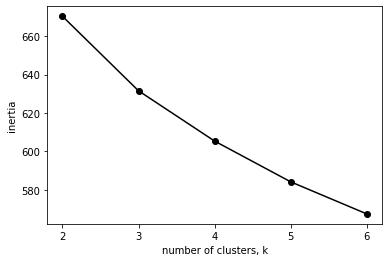

In [41]:
# Inertia Plot
plt.plot(range(2,kmax), inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(range(2,kmax))
plt.show()

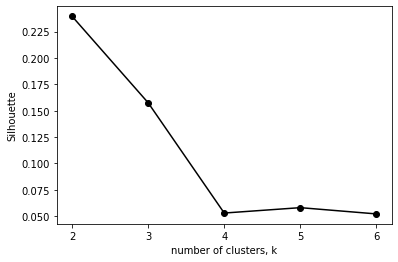

In [42]:
# Sihoutetee Plot - Reaches Global Maximum at Optimal K
plt.plot(range(2,kmax), sil, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('Silhouette')
plt.xticks(range(2,kmax))
plt.show()

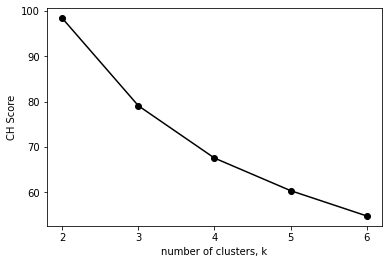

In [43]:
# CH Plot - Reaches Global Maximum at Optimal K
plt.plot(range(2,kmax), ch_score, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('CH Score')
plt.xticks(range(2,kmax))
plt.show()